## Biomedical images

This lab aims for the students to become familiar with image manipulation and representation techniques such as histogram manipulation, or filters, convolutions and fourier transforms.

### Part 1: Histogram and filters

The first part of this script focuses on loading an image, manipulating its histogram, and showing it on screen.

To do so, we will need the following python libraries:


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scipy.ndimage as ndimage
from scipy.special import erf as erf  # For later purposes

These are used for the following:

-   `matplotlib.pyplot` offers reading, writting, and display options for images and plots. This will be useful to show the images on screen.
-   `numpy` is the number one most used library on python for working with arrays, vectors, and numbers altogether, which we'll need to manipulate images.
-   `cv2`, or `opencv-python`, is a huge library for image and video manipulation, which provides tons of filters and transformations easy to use.
-   `scipy.ndimage` is also a library for image manipulation with filters, transformations and other tools.
-   `scipy.special.erf` for the error function, which we'll need for a later example.

An important consideration that must be taken into account when using `opencv-python` is that this library (for optimization reasons) displays colors in a BGR (Blue, Green, Red) form, in contrast with the RGB form most applications use nowadays.

Let us start by loading two images we'll use as examples for our code:


In [2]:
berkeley = plt.imread("image_examples/BerkeleyTower.png")
cameraman = plt.imread("image_examples/cameraman.tif")

These images will already be in RGB. We can show both images by running `matplotlib`'s `pyplot.imshow()`.


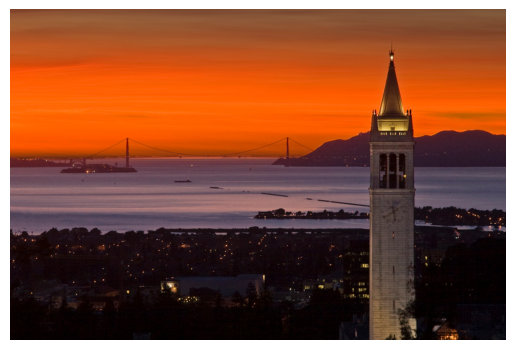

In [3]:
plt.imshow(berkeley)
plt.axis("off")
plt.show()


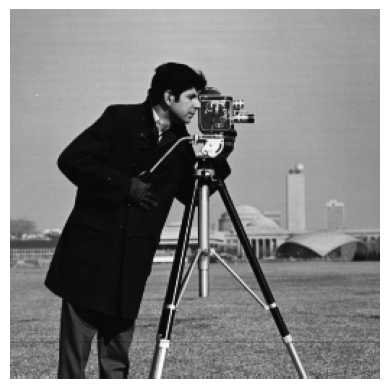

In [4]:
plt.imshow(cameraman, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

Note that the `cameraman.tif` image has a single channel, and as such needs a colormap (`cmap`) to be defined when showing it on screen. By default, all images with a single channel can be thought to be gray-scale images.

The `vmin` and `vmax` parameters determine which is the minimum and maximum values the pixels in the image can take.

To get a grasp of how images are encoded, we can split the channels of a colored image and display them side-by-side.


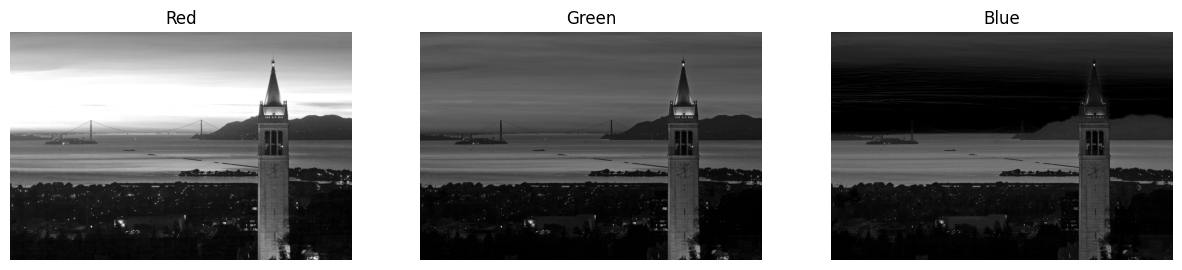

In [5]:
red = berkeley[:, :, 0]
green = berkeley[:, :, 1]
blue = berkeley[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("Red")
ax[0].axis("off")
ax[1].imshow(green, cmap="gray", vmin=0, vmax=1)
ax[1].set_title("Green")
ax[1].axis("off")
ax[2].imshow(blue, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("Blue")
ax[2].axis("off")

plt.show()

Different colormaps may be used to convey the color information easier.


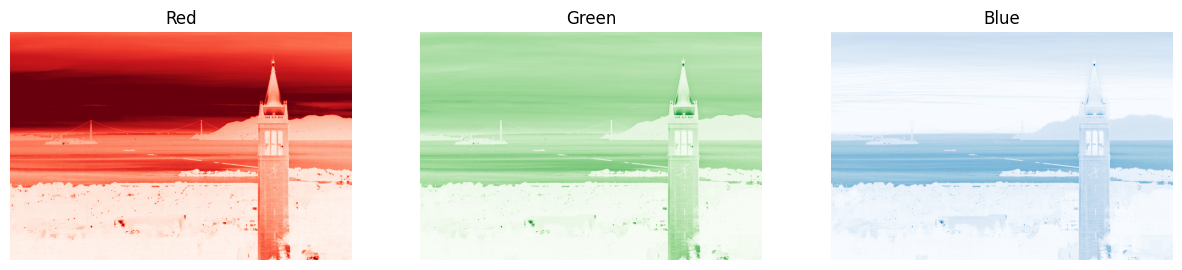

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(red, cmap="Reds", vmin=0, vmax=1)
ax[0].set_title("Red")
ax[0].axis("off")
ax[1].imshow(green, cmap="Greens", vmin=0, vmax=1)
ax[1].set_title("Green")
ax[1].axis("off")
ax[2].imshow(blue, cmap="Blues", vmin=0, vmax=1)
ax[2].set_title("Blue")
ax[2].axis("off")

plt.show()

One can even convert colored images to gray-scale by different methods. The most easy is by averaging the intensity value over the color axis. This means performing the following calculation over all the pixels on the image:

$$
    GS_{ij} = \frac{1}{3}(R_{ij} + G_{ij} + B_{ij})
$$

Keep an eye on the shape of the image's matrix before and after the calculation.


Shape before: (499, 748, 3)
Shape after: (499, 748)


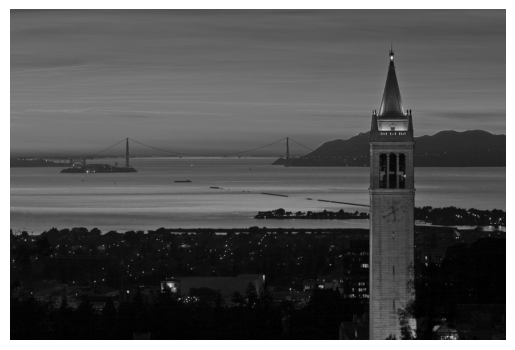

In [7]:
print("Shape before:", berkeley.shape)
gray = np.average(berkeley, axis=2)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()

Note that different ways to make this conversion exist. For instance, the luminance of an image (also gray-scale) gives different importance to the three channels of the image:

$$
    L_{ij} = \frac{1}{3}(0.2126\cdot R_{ij} + 0.7152\cdot G_{ij} + 0.0722\cdot B_{ij})
$$


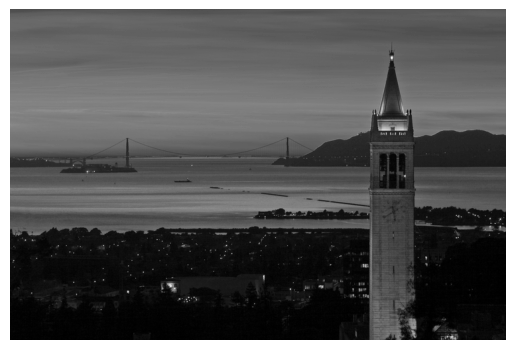

In [8]:
luminance = 0.2126 * red + 0.7152 * green + 0.0722 * blue

plt.imshow(luminance, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()

`opencv` comes with some builtin functions that makes this step easier and more intuitive:


Shape before: (499, 748, 3)
Shape after: (499, 748)


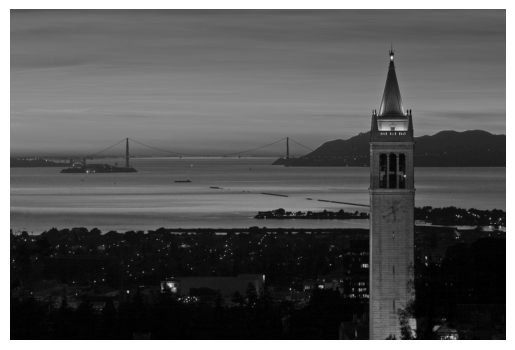

In [9]:
print("Shape before:", berkeley.shape)
gray = cv2.cvtColor(berkeley, cv2.COLOR_RGB2GRAY)
print("Shape after:", gray.shape)

plt.imshow(gray, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()

The histogram of this image can be computed by running over all the pixels on the gray-scale image and counting how many times each of the values appear. This can be done with a single `scipy.ndimage` function:


In [10]:
hist = ndimage.histogram(gray, 0, 1, 256)


Which takes the following inputs:

-   The `input` image for which to construct the histogram
-   The `minimum` value of the image pixels
-   The `maximum` value of the image pixels
-   The `bin count`

Note that the image max and min values were set to 0 and 1, which must be done like this, because `opencv` also normalizes the image pixels to a floating point number between 0 and 1, which is a very common way of encoding images.


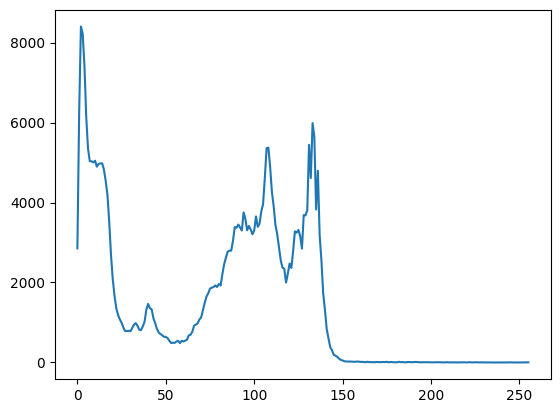

In [11]:
plt.plot(hist)
plt.show()


It becomes obvious in this histogram that the gray-scale image of berkeley tower has a larger ammount of dimmer colors rather than lighter colors. One type of histogram manipulation can be cathegorized under linear transformations, for instance, rescaling all of the image pixels (values from 0 to 1) to another range of values:


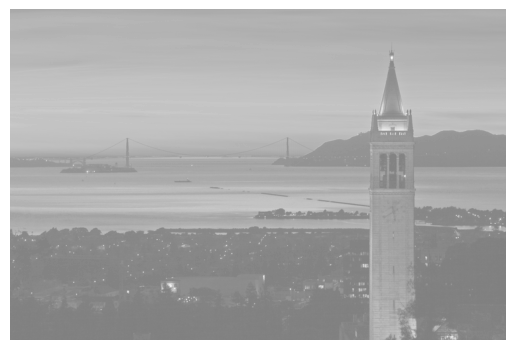

In [12]:
linear_eq = np.interp(gray, (gray.min(), gray.max()), (0.5, 1))

plt.imshow(linear_eq, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()

See how the histogram changed:


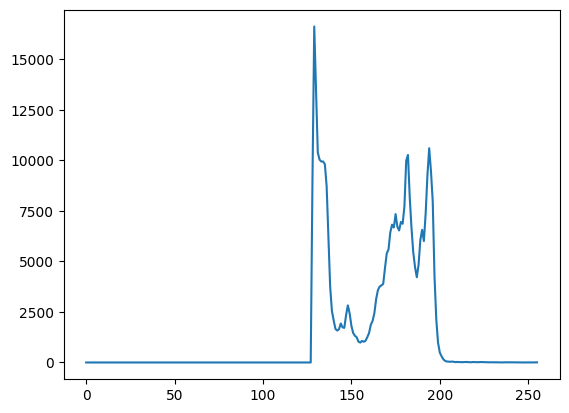

In [13]:
hist = ndimage.histogram(linear_eq, 0, 1, 256)

plt.plot(hist)
plt.show()


This is still not equalized, but one can play a bit with the numbers on the `np.interp` function, which provides an easy way of manipulating with linear transformations the histogram, to try to equalize it a bit.

Looking into the original histogram, most of the pixels present a value under 150 (over 255, which means a value of 150/255 = 0.58823529411 on the normalized image). We can then transform the image with the following:


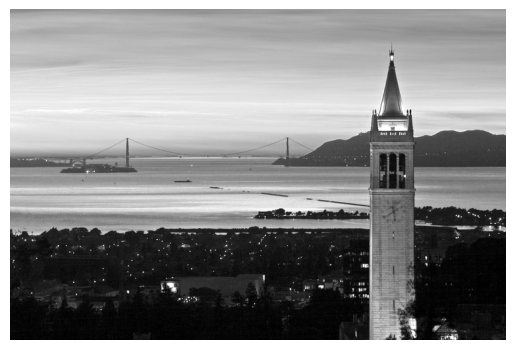

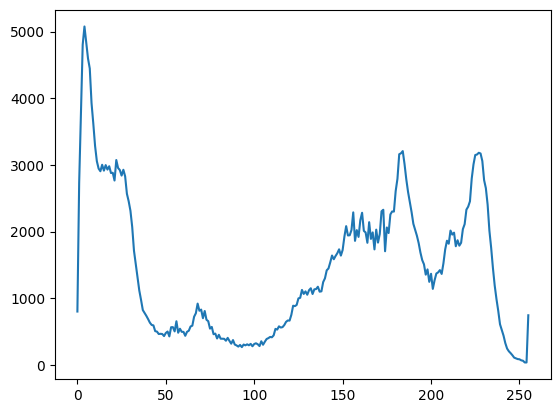

In [14]:
linear_eq = np.interp(gray, (0, 0.58823529411), (0, 1))

plt.imshow(linear_eq, cmap="gray", vmin=0, vmax=1)
plt.axis("off")
plt.show()

hist = ndimage.histogram(linear_eq, 0, 1, 256)
plt.plot(hist)
plt.show()

This clearly improved the histogram of this image, however, it's not still equalized. This can be done with the following steps:

Note that, for the sake of simplicity, we go back to the `uint8` (0 to 255) values for the image pixels.

To start, one must compute the original histogram of the image:


In [15]:
grayUint8 = np.uint8(gray * 255)
hist = ndimage.histogram(grayUint8, 0, 255, 256)


Then one has to compute the cumulative sum of the histogram. This is equal to counting "how many pixels exist with a gray-scale value equal or lower to x":

$$
    cumsum(i) = \sum^i_{j=0} hist_j
$$


In [16]:
cumsum = np.cumsum(hist)


To compare, let us plot the histogram and cumsum back-to-back:


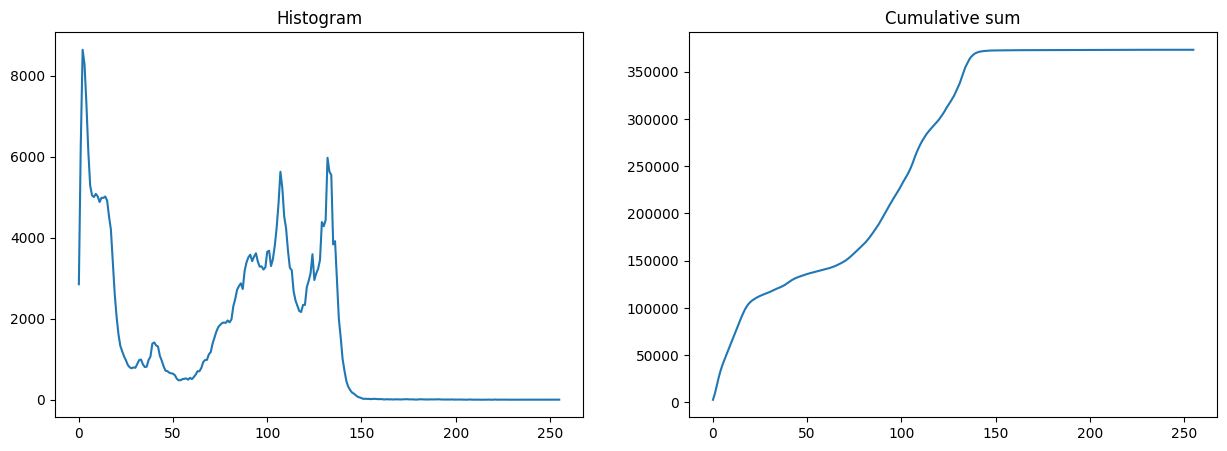

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(hist)
ax[0].set_title("Histogram")
ax[1].plot(cumsum)
ax[1].set_title("Cumulative sum")

plt.show()

Finaly, the new value for the pixel $GS_{ij}$ will be set by normalizing the cumsum from 0 to 255, taking the old value of the pixel and running it through the cumsum function:

$$
    EQ_{ij} = \frac{1}{M} cumsum(GS_{ij})
$$

Where M is the pixel count of the image:

$$
    M=shape_x \times shape_y
$$


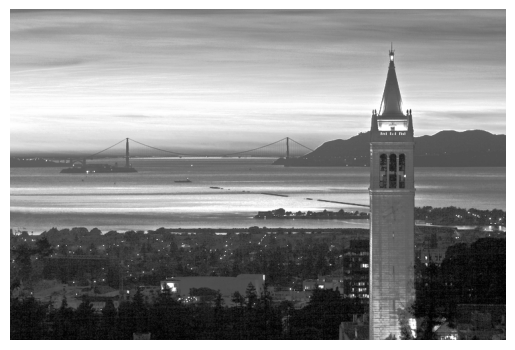

In [18]:
eq = cumsum[grayUint8] * 255 / grayUint8.size

plt.imshow(eq, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

To show the strength of these methods, let us repeat this equalization with the image "Unequalized_Hawkes_Bay_NZ.jpg", which is strongly unequalized:


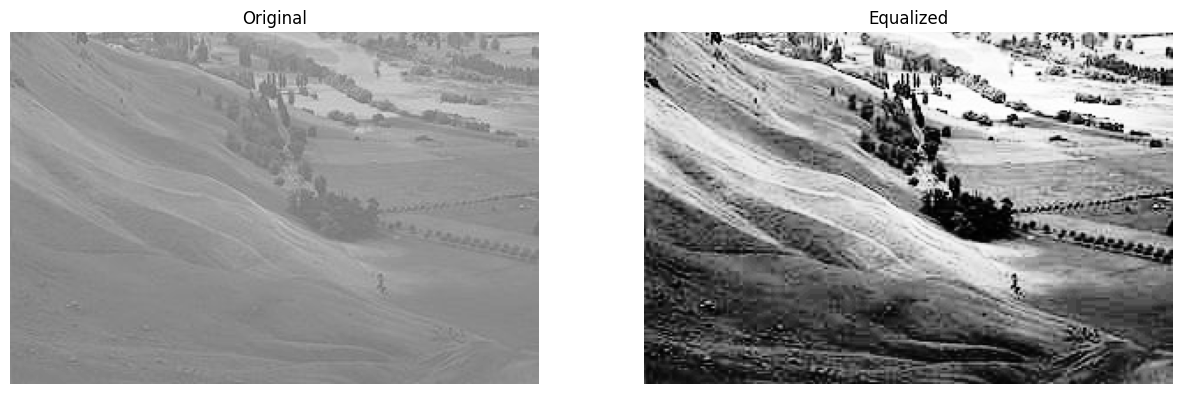

In [19]:
hawkes = plt.imread("image_examples/Unequalized_Hawkes_Bay_NZ.jpg")  # Already in grayscale

eq = np.uint8(np.cumsum(ndimage.histogram(hawkes, 0, 255, 256)) * 255 / hawkes.size)[hawkes]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(hawkes, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(eq, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Equalized")
ax[1].axis("off")

plt.show()

Let us show how the histogram changed:


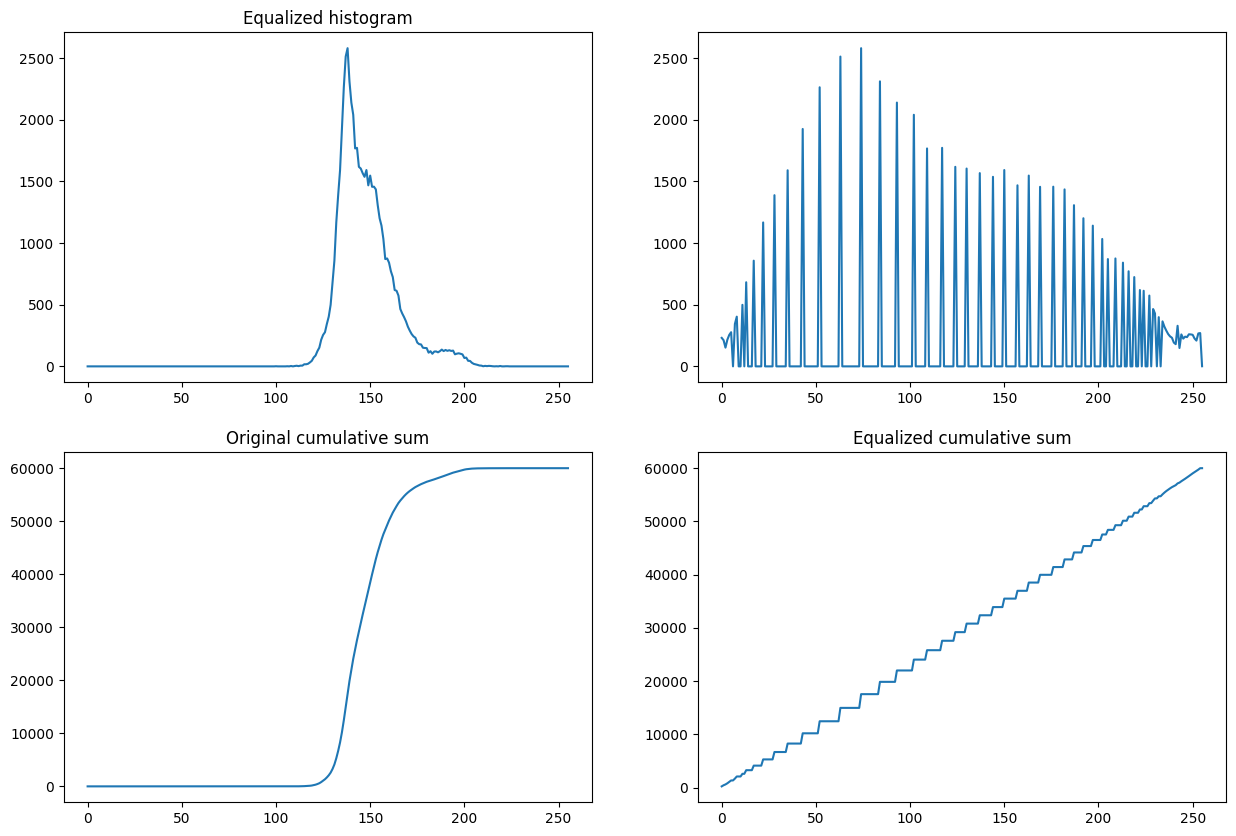

In [20]:
hist = ndimage.histogram(hawkes, 0, 255, 256)
new_hist = ndimage.histogram(eq, 0, 255, 256)
cumsum = np.cumsum(hist)
new_cumsum = np.cumsum(new_hist)

fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].plot(hist)
ax[0, 0].set_title("Original histogram")
ax[1, 0].plot(cumsum)
ax[1, 0].set_title("Original cumulative sum")
ax[0, 1].plot(new_hist)
ax[0, 0].set_title("Equalized histogram")
ax[1, 1].plot(new_cumsum)
ax[1, 1].set_title("Equalized cumulative sum")

plt.show()

This last image is perfect to show what equalizing the histogram means.it just tries to make the cumulative sum a straight increasing line (which is equivalent to making the histogram a straight flat line).

Let us now show another type of image manipulation: **filters**. Filters are algorithms that _filter out_ parts of the image. For instance, if an image has a lot of noise, a low-pass filter might reduce this ammount of noise by removing the frequencies corresponding to it from the fourier transform of the image.

A way of applying this sort of filter is by adding a "blur" to the image. This is: running over all the image and "difusing" the values over their neighbors. A simple way of doing so is by computing the convolution of the image with a set kernel (in this following case a 3x3 matrix with ones everywhere, but normalized):


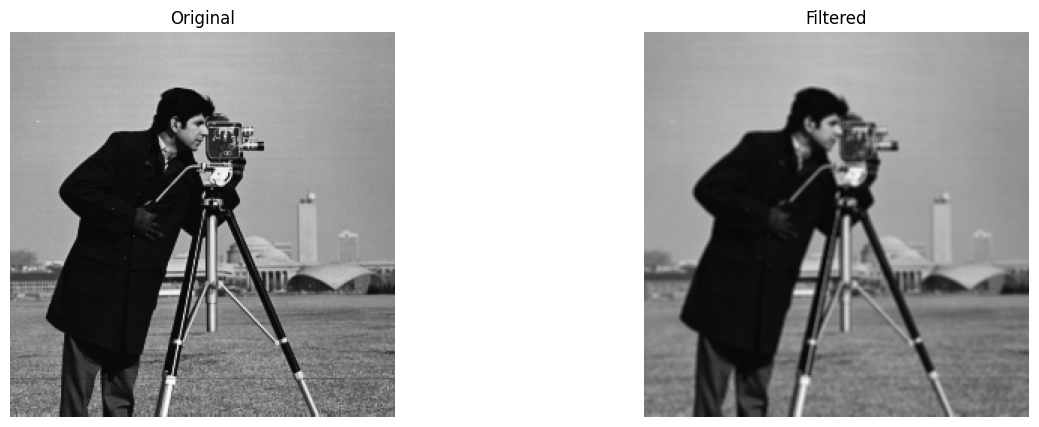

In [21]:
flat_kernel = np.ones((3, 3)) / 9

filtered = ndimage.convolve(cameraman, flat_kernel)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[1].axis("off")

plt.show()

Note how this filter blurred out the image. However, a more common filter to use is a gaussian filter, giving more importance to the center of the kernel. Let us show an example:


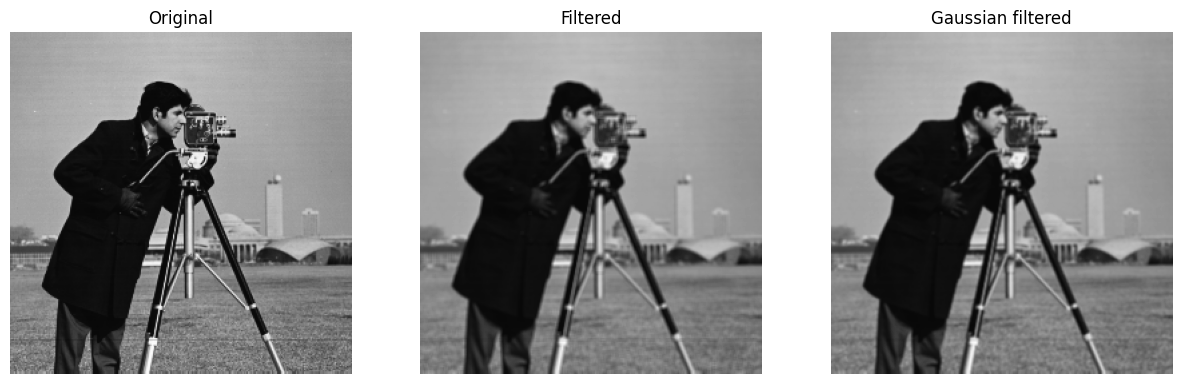

In [22]:
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

gaussian_filtered = ndimage.convolve(cameraman, gaussian_kernel)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[1].axis("off")
ax[2].imshow(gaussian_filtered, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Gaussian filtered")
ax[2].axis("off")

plt.show()

A high-pass filter might be applied to identify the edges and corners of an image, and can be done also in a convolution-way such as the following:


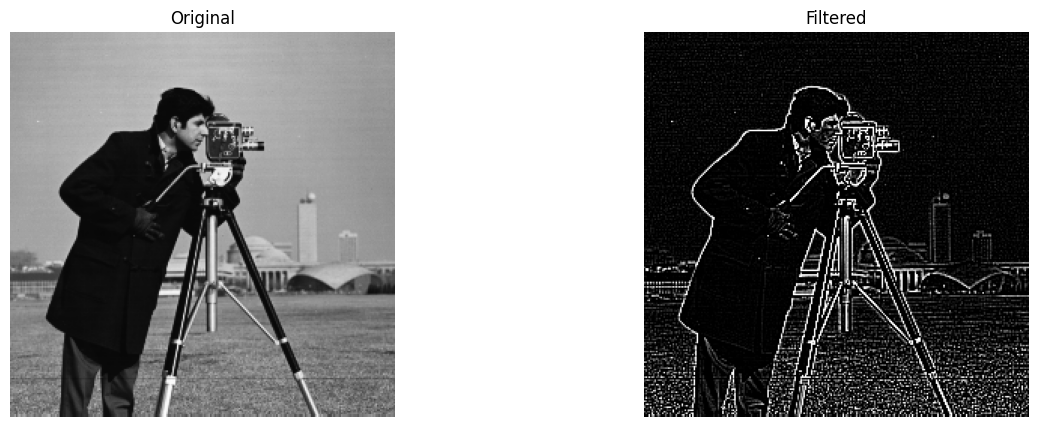

In [23]:
high_pass = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

filtered_high_pass = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, high_pass, output=filtered_high_pass)
filtered_high_pass = np.clip(filtered_high_pass, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered_high_pass, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[1].axis("off")

plt.show()

Note that additional steps were taken before and after applying the filter. This is because this filter has the possibility for the result to have negative values, as well as values above the maximum for the unsigned integer type typically used for image (values ranging from 0 to 255). To correct for that, the result image was created as a `np.int32` type, which accepts both negative values and values above 255. Then, all the values were clipped to the intended range (0 to 255).

Filters can also be used to detect edges on a given axis. For instance, the following code extracts only the vertical edges:


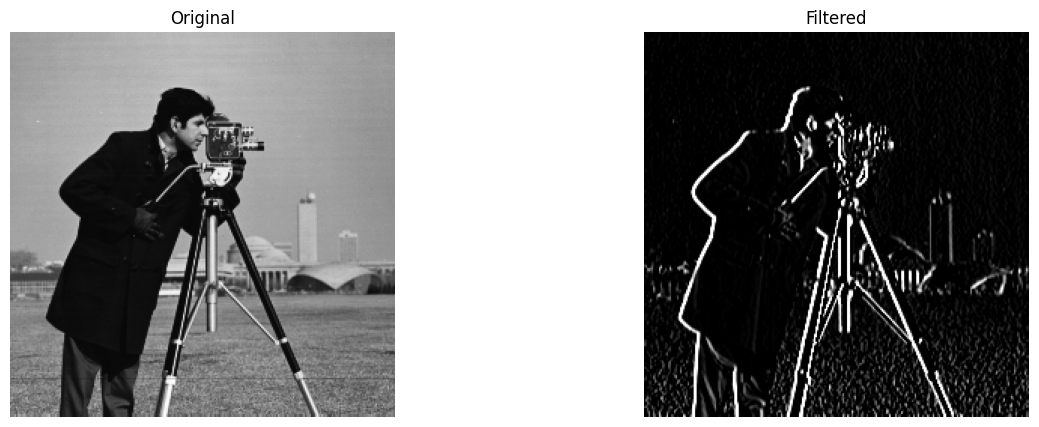

In [24]:
vertical_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

filtered_vertical = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, vertical_kernel, output=filtered_vertical)
filtered_vertical = np.clip(filtered_vertical, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered_vertical, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[1].axis("off")

plt.show()

Compare it with the following kernel that does the same:


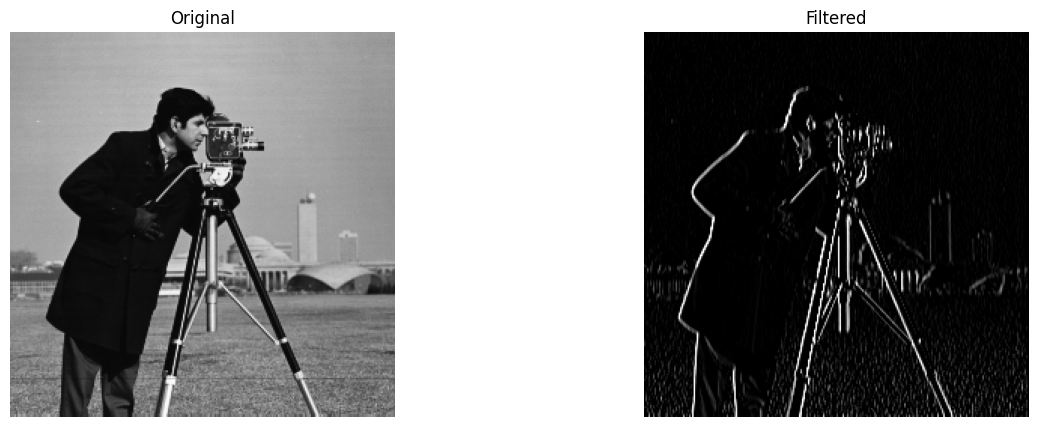

In [25]:
vertical_kernel = np.array([[-1, 1, 0], [-1, 1, 0], [-1, 1, 0]])

filtered_vertical = np.zeros_like(cameraman, dtype=np.int32)
ndimage.convolve(cameraman, vertical_kernel, output=filtered_vertical)
filtered_vertical = np.clip(filtered_vertical, 0, 255)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered_vertical, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Filtered")
ax[1].axis("off")

plt.show()

This shows that multiple filters might do the same, and depending on the original image and the objective of the filtering, one or the other might be used.

There exists a type of noise known as _salt and pepper_ as a nod to the appearence of the image when this sort of noise is present. It consists of a random ammout of pixels that are set to the maximum / minimum value of the image caused by malfunctions on the detection, for example.

The following code aims to recreate this type of noise:


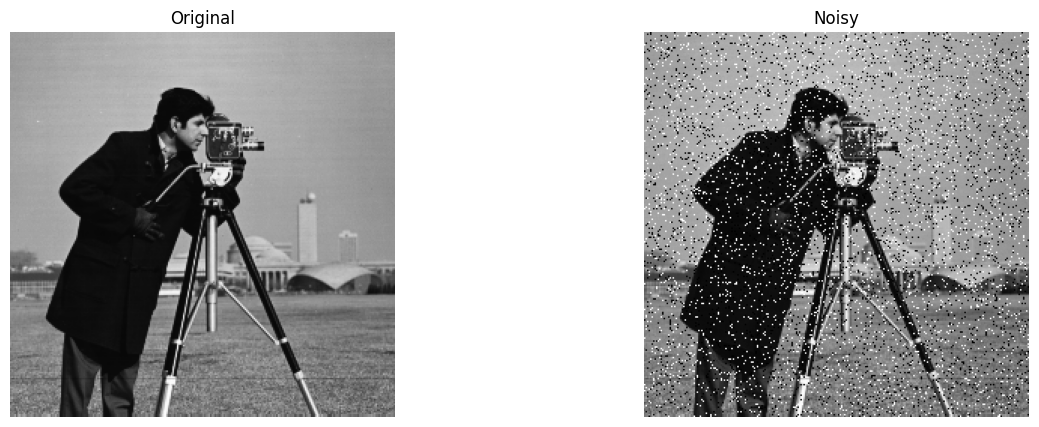

In [26]:
salt_and_pepper = np.random.rand(*cameraman.shape)
noisy = cameraman.copy()
noisy[salt_and_pepper < 0.05] = 0
noisy[salt_and_pepper > 0.95] = 255

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cameraman, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(noisy, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Noisy")
ax[1].axis("off")

plt.show()

Note the resemblance of this sort of distortion with its name, _salt and pepper_. The first instinct to correct this sort of noise would be to apply a low-pass filter such as a gaussian filter. This, however does not solve the problem, as it is seen in the following example.

A more suitable filtering method consists on running over all the image and taking the local median (analyzing the neighborhood of all the pixels, given a kernel, and taking the median):


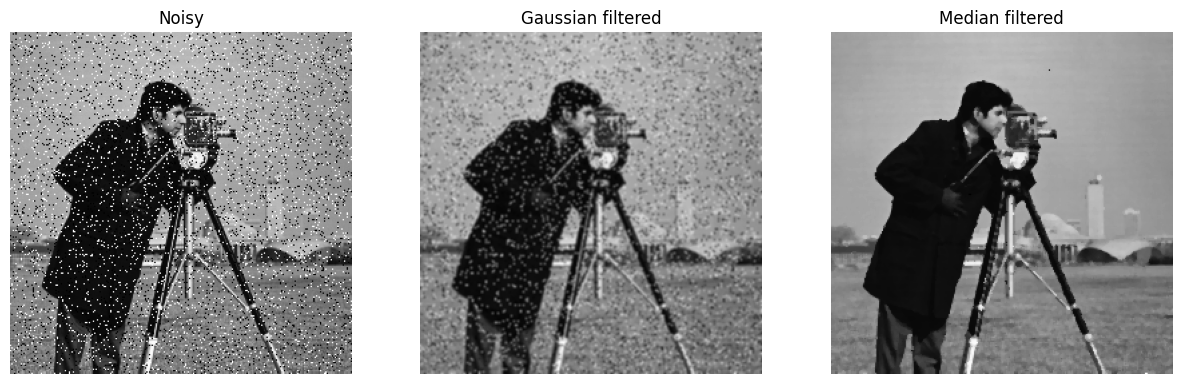

In [27]:
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

gaussian_filtered = ndimage.convolve(noisy, gaussian_kernel)

filtered_median = ndimage.median_filter(noisy, size=3)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(noisy, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Noisy")
ax[0].axis("off")
ax[1].imshow(gaussian_filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Gaussian filtered")
ax[1].axis("off")
ax[2].imshow(filtered_median, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Median filtered")
ax[2].axis("off")

plt.show()

Note that the noise has been pretty much removed from the image. We can study how much of this noise is this filter able to remove depending on the kernel size and the ammount of noise:


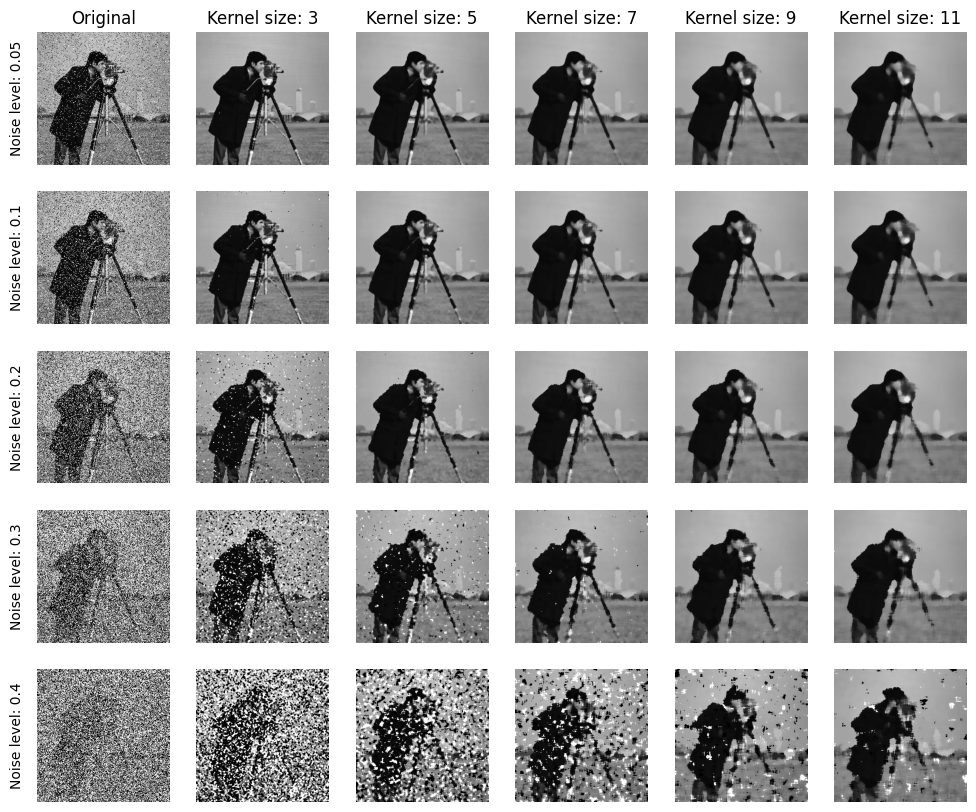

In [42]:
noise_levels = [0.05, 0.1, 0.2, 0.3, 0.4]
kernel_sizes = [0, 3, 5, 7, 9, 11]

fig, ax = plt.subplots(len(noise_levels), len(kernel_sizes), figsize=(12, 10))

for i, noise_level in enumerate(noise_levels):
    for j, kernel_size in enumerate(kernel_sizes):
        noisy = cameraman.copy()
        salt_and_pepper = np.random.rand(*cameraman.shape)
        noisy[salt_and_pepper < noise_level] = 0
        noisy[salt_and_pepper > 1 - noise_level] = 255
        if kernel_size == 0:
            filtered = noisy
        else:
            filtered = ndimage.median_filter(noisy, size=kernel_size)
        ax[i, j].imshow(filtered, cmap="gray", vmin=0, vmax=255)
        ax[i, j].axis("off")


# Add titles to the first row
for j, kernel_size in enumerate(kernel_sizes):
    if kernel_size == 0:
        ax[0, j].set_title("Original")
    else:
        ax[0, j].set_title("Kernel size: {}".format(kernel_size))

# Add titles to the first column
for i, noise_level in enumerate(noise_levels):
    ax[i, 0].text(
        -0.15,
        0.5,
        "Noise level: {}".format(noise_level),
        rotation=90,
        va="center",
        ha="center",
        transform=ax[i, 0].transAxes,
    )


plt.show()

Note that this filter reduces correctly nearly every case of salt and pepper noise that was tested. However, when having a larger kernel size than needed, information might be lost (see the first row of the image as an example, where a kernel size of 3 was able to correct the noise, and having a bigger kernel size did not improve the image, but it made it worse).


### Part 2: MRI images

We'll need a special function to load raw data from the `.RAW` example images.


In [29]:
def load_raw(filename, shape=(512, 512), dtype=np.uint8):
    with open(filename, "rb") as f:
        data = np.fromfile(f, dtype=dtype, count=np.prod(shape))
    return data.reshape(shape)

Let us first try and load an image:


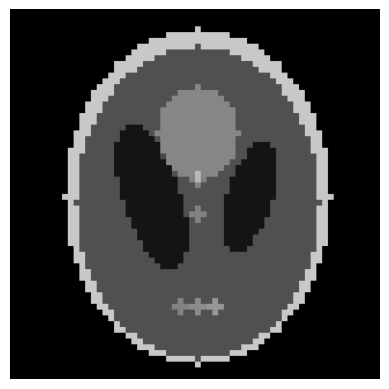

In [30]:
raw = load_raw("biomed_images/BRAIN.RAW", shape=(256, 256))

plt.imshow(raw, cmap="gray", vmin=0, vmax=255)
plt.axis("off")
plt.show()

We will now create two cursors (X and Y cursors) that will allow us to pinpoint some information from the image. These will be two straight lines that will move with the arrow keys. To make this interactive I'll be using opencv.


In [31]:
# Create window
cv2.namedWindow("Image")

# Starting position for the cursors
x = raw.shape[1] // 2
y = raw.shape[0] // 2

# Plot for the intensity curves
plt.ion()
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
horizontal = ax[0].plot(raw[y, :])[0]
ax[0].set_ylim(0, 255)
ax[0].set_xlim(0, raw.shape[1])
ax[0].set_title("Horizontal intensity")

vertical = ax[1].plot(raw[:, x])[0]
ax[1].set_ylim(0, 255)
ax[1].set_xlim(0, raw.shape[0])
ax[1].set_title("Vertical intensity")

rgb_raw = cv2.cvtColor(raw, cv2.COLOR_GRAY2RGB)

running = True
while running:
    img = rgb_raw.copy()

    horizontal.set_ydata(raw[y, :])
    vertical.set_ydata(raw[:, x])
    fig.canvas.draw()

    plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    plot = plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    imgSquareSize = max(img.shape[0], img.shape[1], plot.shape[0])
    pltX = imgSquareSize + plot.shape[1]
    pltY = imgSquareSize

    cv2.line(img, (0, y), (img.shape[1], y), (255, 255, 0), 2)
    cv2.line(img, (x, 0), (x, img.shape[0]), (255, 255, 0), 2)

    display = np.zeros((pltY, pltX, 3), dtype=np.uint8)
    display[: img.shape[0], : img.shape[1], :] = img
    display[: plot.shape[0], imgSquareSize : imgSquareSize + plot.shape[1], :] = plot[:, :, ::-1]

    cv2.putText(
        display,
        "x={}, y={}".format(x, y),
        (10, imgSquareSize - 10),
        cv2.FONT_HERSHEY_PLAIN,
        1,
        (255, 255, 0),
        1,
        cv2.LINE_AA,
    )

    cv2.imshow("Image", display)

    key = cv2.waitKey(1)
    if key == 27 or key == ord("q"):  # ESC or Q to quit
        running = False
    elif key == ord("w"):
        y = max(y - 1, 0)
    elif key == ord("s"):
        y = min(y + 1, img.shape[0])
    elif key == ord("a"):
        x = max(x - 1, 0)
    elif key == ord("d"):
        x = min(x + 1, img.shape[1])

cv2.destroyAllWindows()
plt.close(fig)

These tools are useful, for example, to measure different parts on a medical image. In this example, the black ellipses are: Around 100 pixels on the main diagonal, and 37 pixels on the shorter diagonal for the big one, and 74 pixels and 33 pixels for the small ellipse.


#### Equalization

We shall now try to equalize image `ART1BIO.RAW`, which is the following image:


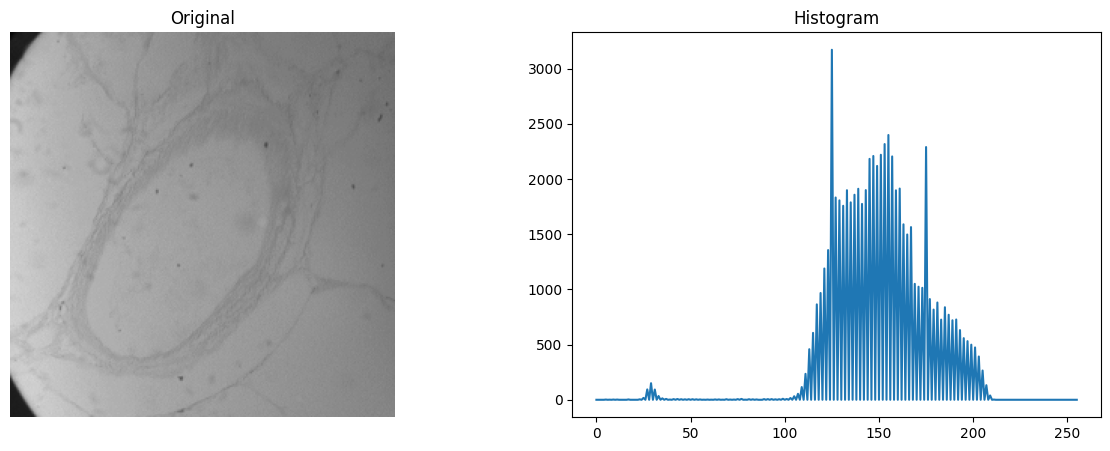

In [32]:
raw = load_raw("biomed_images/ART1BIO.RAW", shape=(256, 256))
hist = ndimage.histogram(raw, 0, 255, 256)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(raw, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].plot(hist)
ax[1].set_title("Histogram")

plt.show()

This image is clearly not equalized. Let us first equalize it as shown before:


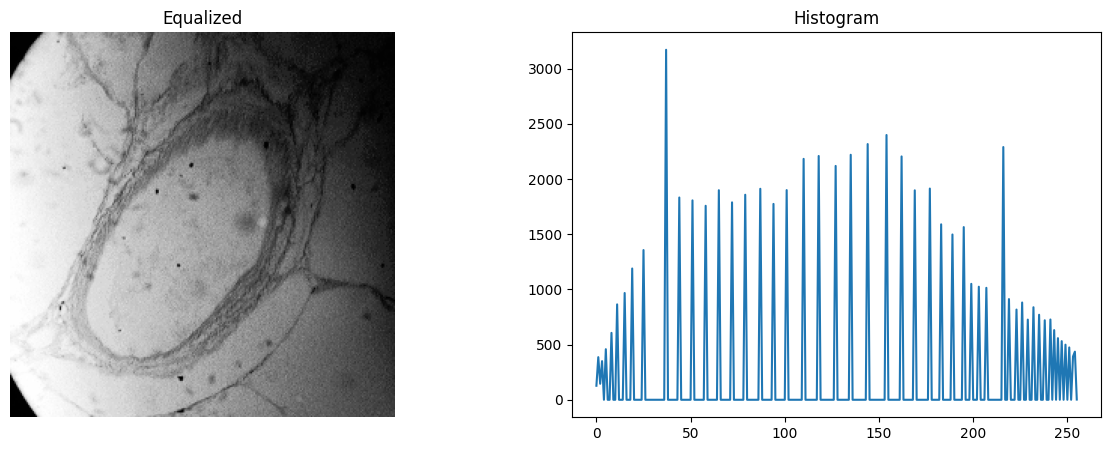

In [33]:
eq = np.uint8(np.cumsum(hist) / np.sum(hist) * 255)[raw]

new_hist = ndimage.histogram(eq, 0, 255, 256)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(eq, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Equalized")
ax[0].axis("off")
ax[1].plot(new_hist)
ax[1].set_title("Histogram")

plt.show()

Matlab has some built-in functions that let us equalize the image in a customizable way. However, python does not have a direct way of doing so.

Let us try to equalize the image into a 64 bin histogram:


[ 0  1  2  3  4  6  9 11 12 14 16 18 20 21 23 25 27 29 31 34 36 38 40 42
 44 46 47 49 50 51 52 54 55 56 57 58 59 60 61 62 63 64]


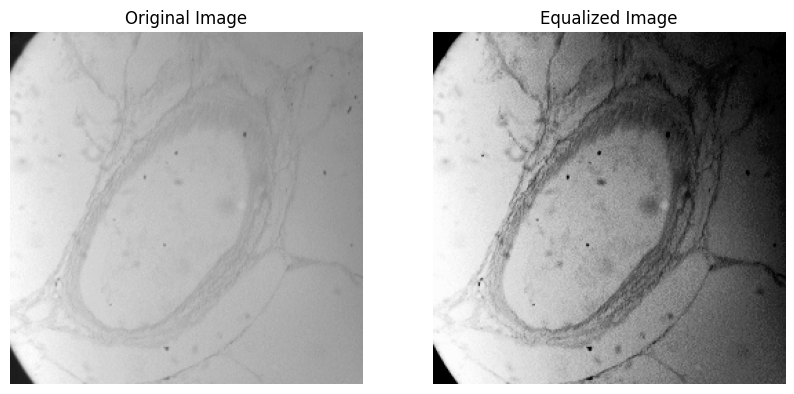

In [34]:
# Compute the histogram
hist = ndimage.histogram(raw, 0, 255, 256)
bins = np.arange(256)

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(hist) / np.sum(hist)
lut = np.uint8(cdf * 64) # 64 is the number of gray levels we want

# Apply the equalization using the lookup table
im_eq = lut[raw]
# Gray colors will be ranging from 0 to 64. Matplotlib will take care of renormalizing it to plot it.

# We can see the unique values in the image to check.
print(np.unique(im_eq))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(raw, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(im_eq, cmap="gray") 
ax[1].set_title("Equalized Image")
ax[1].axis("off")
plt.show()

Now we'll put the things we've learned to use. We'll add salt and pepper noise to the `CT.RAW` image, and then we'll try to remove it using the median filter.

We'll apply the same example as before to show how the system removes it depending on the kernel size and the ammount of noise:

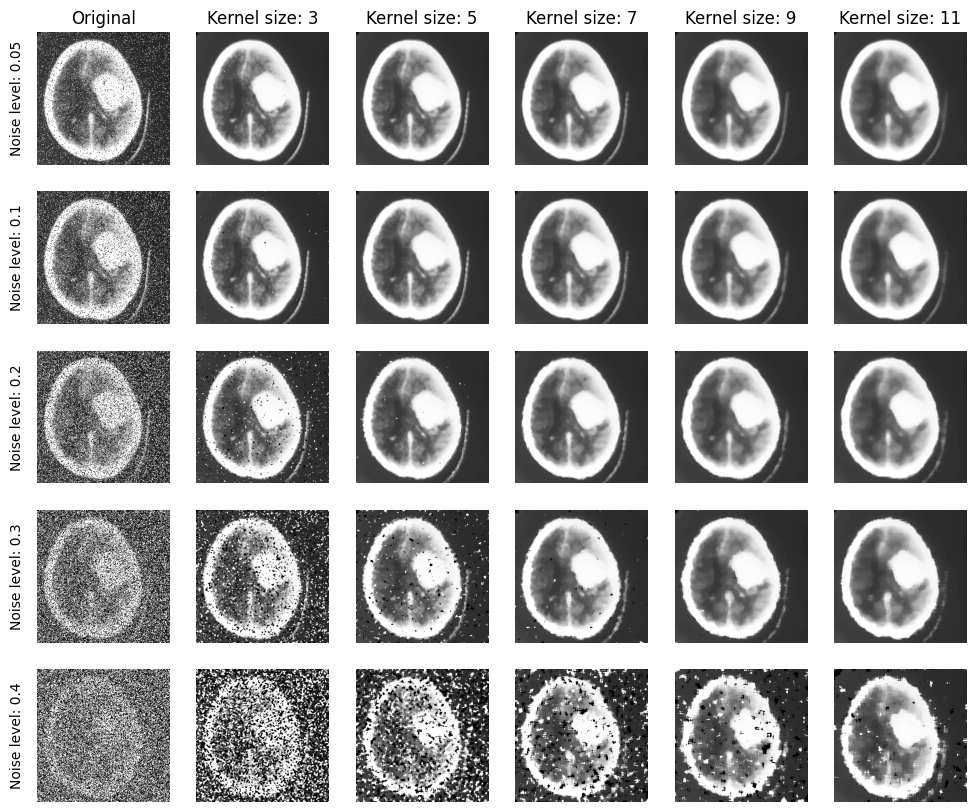

In [47]:
# Load the image
raw_ct = load_raw("biomed_images/CT.RAW", shape=(256, 256))

# Noise levels and kernel sizes we want to study
noise_levels = [0.05, 0.1, 0.2, 0.3, 0.4]
kernel_sizes = [0, 3, 5, 7, 9, 11]

fig, ax = plt.subplots(len(noise_levels), len(kernel_sizes), figsize=(12, 10))

for i, noise_level in enumerate(noise_levels):
    for j, kernel_size in enumerate(kernel_sizes):
        noisy = raw_ct.copy()
        salt_and_pepper = np.random.rand(*raw_ct.shape)
        noisy[salt_and_pepper < noise_level] = 0
        noisy[salt_and_pepper > 1 - noise_level] = 255
        if kernel_size == 0:
            filtered = noisy
        else:
            filtered = ndimage.median_filter(noisy, size=kernel_size)
        ax[i, j].imshow(filtered, cmap="gray", vmin=0, vmax=255)
        ax[i, j].axis("off")


# Add titles to the first row
for j, kernel_size in enumerate(kernel_sizes):
    if kernel_size == 0:
        ax[0, j].set_title("Original")
    else:
        ax[0, j].set_title("Kernel size: {}".format(kernel_size))

# Add titles to the first column
for i, noise_level in enumerate(noise_levels):
    ax[i, 0].text(
        -0.15,
        0.5,
        "Noise level: {}".format(noise_level),
        rotation=90,
        va="center",
        ha="center",
        transform=ax[i, 0].transAxes,
    )


plt.show()
# Apply median filter


Looks amazing.

Now on to the low-pass filter. We'll use the `CEREBRO.RAW` image, and we'll apply a gaussian filter to it. We'll use a 3x3 uniform kernel, and compare it with a 3x3 gaussian kernel:

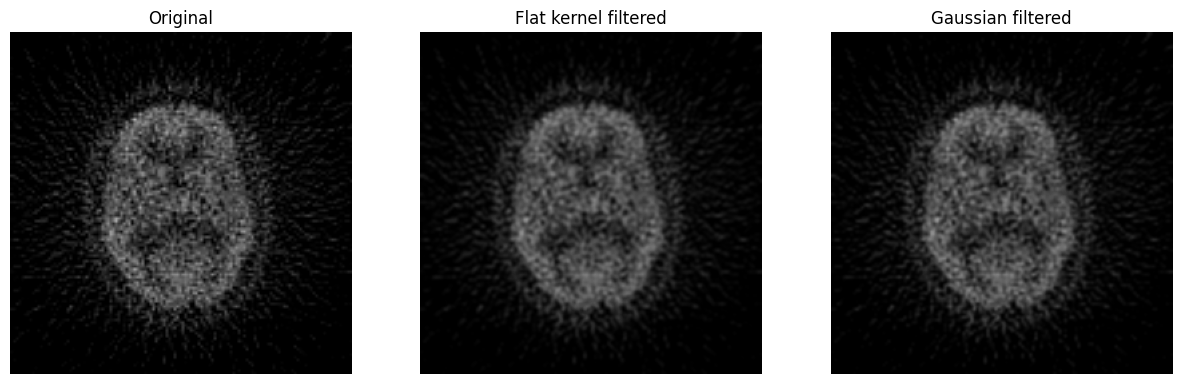

In [49]:
raw_cerebro = load_raw("biomed_images/CEREBRO.RAW", shape=(256, 256))

flat_kernel = np.ones((3, 3)) / 9
gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

flat_filtered = ndimage.convolve(raw_cerebro, flat_kernel)
gaussian_filtered = ndimage.convolve(raw_cerebro, gaussian_kernel)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(raw_cerebro, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(flat_filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Flat kernel filtered")
ax[1].axis("off")
ax[2].imshow(gaussian_filtered, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Gaussian filtered")
ax[2].axis("off")

plt.show()

The noise is still present, but it is reduced. Let us try with a 5x5 kernel:

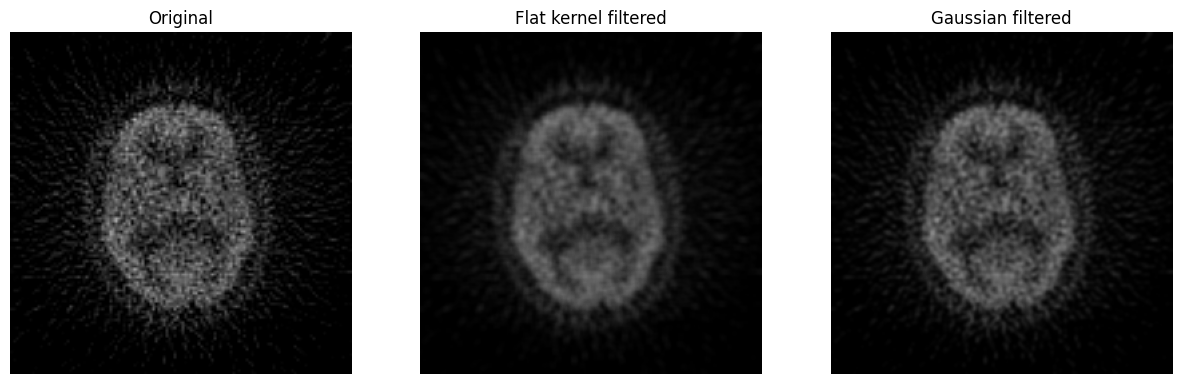

In [50]:
raw_cerebro = load_raw("biomed_images/CEREBRO.RAW", shape=(256, 256))

flat_kernel = np.ones((5, 5)) / 25
gaussian_kernel = np.array(
    [
        [1, 4, 7, 4, 1],
        [4, 16, 26, 16, 4],
        [7, 26, 41, 26, 7],
        [4, 16, 26, 16, 4],
        [1, 4, 7, 4, 1],
    ]
) / 273

flat_filtered = ndimage.convolve(raw_cerebro, flat_kernel)
gaussian_filtered = ndimage.convolve(raw_cerebro, gaussian_kernel)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(raw_cerebro, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(flat_filtered, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("Flat kernel filtered")
ax[1].axis("off")
ax[2].imshow(gaussian_filtered, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("Gaussian filtered")
ax[2].axis("off")

plt.show()

It clearly improved the image, but it blurred it out. This is the trade-off between noise reduction and image quality on low-pass filters.

Let us now try a high-pass filter. We'll use the `BRAIN.RAW` image, and we'll apply several high-pass filters to it. We'll try with a laplacian filter, and two directional filters.

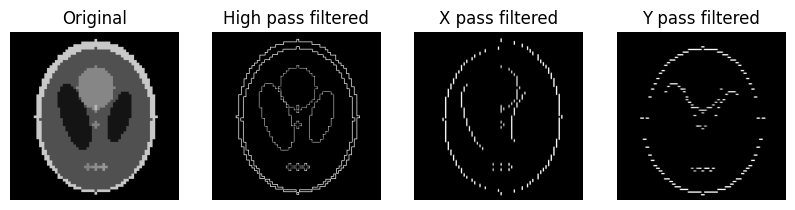

In [55]:
high_pass_kernel = np.array(
    [
        [-1, -1, -1],
        [-1, 8, -1],
        [-1, -1, -1],
    ]
)
x_pass_kernel = np.array(
    [
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1],
    ]
)
y_pass_kernel = np.array(
    [
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1],
    ]
)

# Note that y_pass_kernel = x_pass_kernel.T

# Load the image
raw_brain = load_raw("biomed_images/BRAIN.RAW", shape=(256, 256))

# Again, after we convolve, we need to clip the values to [0, 255], because negative values are possible
def filter_image(image, kernel):
    filtered = np.zeros_like(image, dtype=np.int32)
    ndimage.convolve(image, kernel, output=filtered)
    filtered = np.clip(filtered, 0, 255)
    return filtered

filtered_high_pass = filter_image(raw_brain, high_pass_kernel)
filtered_x_pass = filter_image(raw_brain, x_pass_kernel)
filtered_y_pass = filter_image(raw_brain, y_pass_kernel)


fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0].imshow(raw_brain, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filtered_high_pass, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("High pass filtered")
ax[1].axis("off")
ax[2].imshow(filtered_x_pass, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("X pass filtered")
ax[2].axis("off")
ax[3].imshow(filtered_y_pass, cmap="gray", vmin=0, vmax=255)
ax[3].set_title("Y pass filtered")
ax[3].axis("off")

plt.show()

Note, again, that the laplacian filter highlights all the edges on the image, whereas the x-pass and the y-pass directionals high-pass filters highlight only the edges on the x and y axis, respectively (this means, the x-pass highlights vertical edges, and the y-pass highlights horizontal edges).

Note that convolutions on the image space can be thought of as products on the fourier space. This means that high-pass and low-pass filters are really equivalent to applying a mask on the fourier transform of the image. The following code demonstrates this:

Numpy has a built-in function to compute the fourier transform of an image. Let us use it to compute the fourier transform of the `CEREBRO.RAW` image:

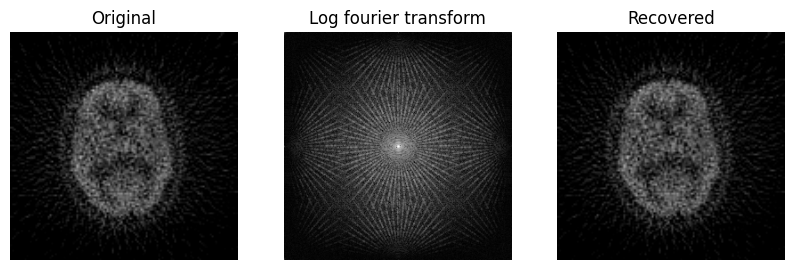

In [90]:
def fourier_transform(img):
    return np.fft.fftshift(np.fft.fft2(img))

def inverse_fourier_transform(img):
    return np.abs(np.fft.ifft2(img))

def magnitude_spectrum(img):
    return np.log(np.abs(img) + 1)

raw_cerebro = load_raw("biomed_images/CEREBRO.RAW", shape=(256, 256)) / 255 # We'll normalize it to [0, 1] for this example
cerebro_fourier = fourier_transform(raw_cerebro)

# To plot the fourier transform, we shall modify it a bit, because the values are complex, and too small
mag_spectrum = magnitude_spectrum(cerebro_fourier)

# Note that we can recover the original image by applying the inverse fourier transform
recovered_cerebro = inverse_fourier_transform(cerebro_fourier)


fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(raw_cerebro, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(mag_spectrum, cmap="gray")
ax[1].set_title("Log fourier transform")
ax[1].axis("off")
ax[2].imshow(recovered_cerebro, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("Recovered")
ax[2].axis("off")

plt.show()

We'll now apply a cookie-cutter mask to the fourier transform of the image. For this example we'll eliminate all the frequencies outside of a circle on the center of the image. This is equivalent to applying a sort of low-pass filter to the image. Let us see the result:

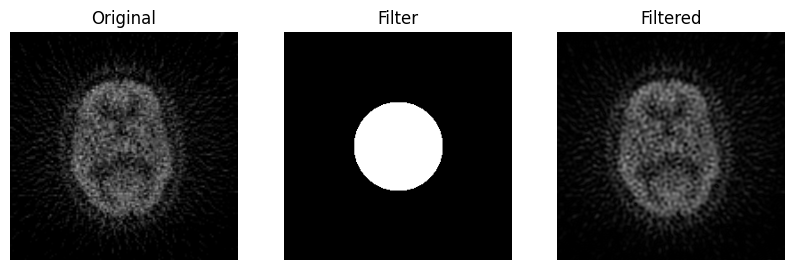

In [77]:
raw_cerebro = load_raw("biomed_images/CEREBRO.RAW", shape=(256, 256)) / 255 # We'll normalize it to [0, 1] for this example
cerebro_fourier = fourier_transform(raw_cerebro)

# Low pass filter. Let us create a meshgrid (X, Y), to create a circle image:
X, Y = np.meshgrid(np.arange(256), np.arange(256))
# We can now create a circle image, with radius 50, centered at (128, 128)
filter = np.sqrt((X - 128) ** 2 + (Y - 128) ** 2) < 50

# We can now apply the filter to the fourier transform
filtered_cerebro_fourier = cerebro_fourier * filter
# This is the equivalent of setting every pixel outside of the circle to 0

# And recover the image
filtered_cerebro = inverse_fourier_transform(filtered_cerebro_fourier)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(raw_cerebro, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(filter, cmap="gray")
ax[1].set_title("Filter")
ax[1].axis("off")
ax[2].imshow(filtered_cerebro, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("Filtered")
ax[2].axis("off")

plt.show()


Note how the result is pretty close to the gaussian-filtered image we got before. Also note that different radiuses on the circle will give different results, and that the smaller the radius (the less frequencies we let pass), the more the image will be blurred out.

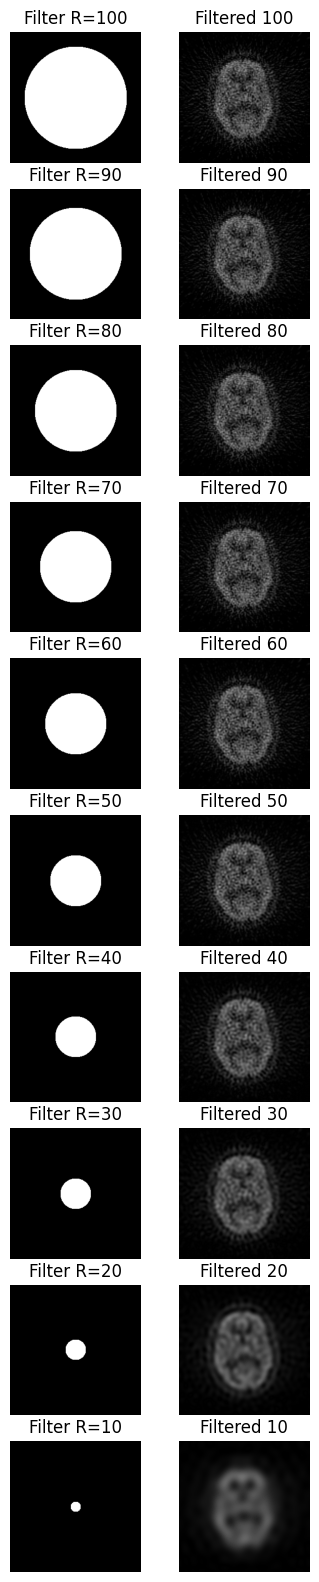

In [83]:
raw_cerebro = load_raw("biomed_images/CEREBRO.RAW", shape=(256, 256)) / 255 # We'll normalize it to [0, 1] for this example
cerebro_fourier = fourier_transform(raw_cerebro)

radiuses = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
radiuses = sorted(radiuses, reverse=True) # Make sure the first one is the biggest radius (the less filtered one)

# Low pass filter. Let us create a meshgrid (X, Y), to create a circle image:
X, Y = np.meshgrid(np.arange(256), np.arange(256))

fig, ax = plt.subplots( len(radiuses), 2,figsize=(4, len(radiuses)*2))
for j, radius in enumerate(radiuses):
    # We can now create a circle image, with radius 50, centered at (128, 128)
    filter = np.sqrt((X - 128) ** 2 + (Y - 128) ** 2) < radius

    # We can now apply the filter to the fourier transform
    filtered_cerebro_fourier = cerebro_fourier * filter

    # And recover the image
    filtered_cerebro = inverse_fourier_transform(filtered_cerebro_fourier)

    ax[j, 0].imshow(filter, cmap="gray")
    ax[j, 0].set_title(f"Filter R={radius}")
    ax[j, 0].axis("off")
    ax[j, 1].imshow(filtered_cerebro, cmap="gray", vmin=0, vmax=1)
    ax[j, 1].set_title(f"Filtered {radius}")
    ax[j, 1].axis("off")

plt.show()

Note how the smaller the radius, the more blurred out the image becomes.

We can use fourier transform filters to recover images by simulating what the movement of the system caused (in terms of blur) and correcting for it:

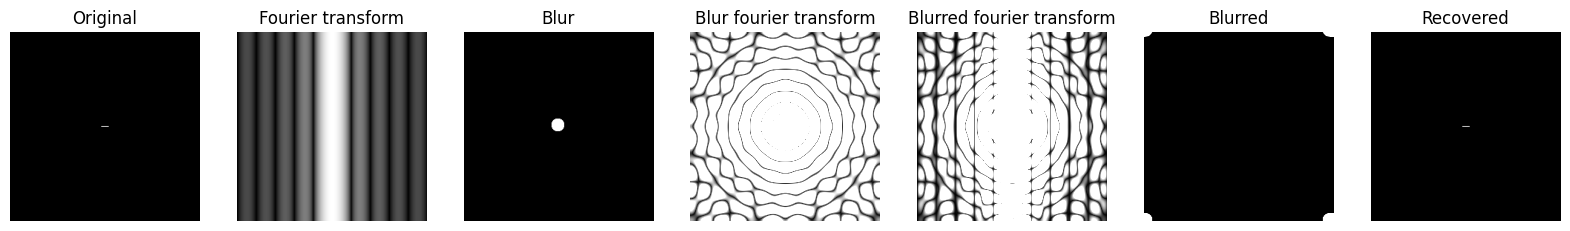

In [111]:
segment = load_raw("biomed_images/SEGMENTB.RAW", shape=(256, 256)) / 255
segment_fourier = fourier_transform(segment)

# This blur should be unknown.
blur = load_raw("biomed_images/CIRC.RAW", shape=(256, 256)) / 255
blur_fourier = fourier_transform(blur)

# Create a blurred image:
blurred_segment_fourier = segment_fourier * blur_fourier
blurred_segment = inverse_fourier_transform(blurred_segment_fourier)

############### RECONSTRUCTION ####################
# We suppose a circle blur (this example is quite ridiculous, but it is just to show the principle)
blur = load_raw("biomed_images/CIRC.RAW", shape=(256, 256)) / 255

# We load the blurred image (symbolic):
blurred_image = blurred_segment

# We compute the fourier transform of the blurred image:
blurred_image_fourier = fourier_transform(blurred_image)

# And we divide the fourier transform of the blurred image by the fourier transform of the blur:
recovered_fourier = blurred_image_fourier / blur_fourier

# And recover the original image:
recovered = inverse_fourier_transform(recovered_fourier)

fig, ax = plt.subplots(1, 7, figsize=(20, 5))
ax[0].imshow(segment, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(magnitude_spectrum(segment_fourier), cmap="gray")
ax[1].set_title("Fourier transform")
ax[1].axis("off")
ax[2].imshow(blur, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("Blur")
ax[2].axis("off")
ax[3].imshow(magnitude_spectrum(blur_fourier), cmap="gray", vmin=0, vmax=1)
ax[3].set_title("Blur fourier transform")
ax[3].axis("off")
ax[4].imshow(magnitude_spectrum(blurred_segment_fourier), cmap="gray", vmin=0, vmax=1)
ax[4].set_title("Blurred fourier transform")
ax[4].axis("off")
ax[5].imshow(blurred_segment, cmap="gray", vmin=0, vmax=1)
ax[5].set_title("Blurred")
ax[5].axis("off")
ax[6].imshow(recovered, cmap="gray", vmin=0, vmax=1)
ax[6].set_title("Recovered")
ax[6].axis("off")

plt.show()

I'm pretty sure the above example is not correct, but it's pretty much a copy of the example given in the reference code.